Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [3]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/gold_price.csv

--2021-09-14 15:11:10--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/gold_price.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.114
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130560 (128K) [text/csv]
Saving to: ‘gold_price.csv’

gold_price.csv      100%[===================>] 127.50K   550KB/s    in 0.2s    

2021-09-14 15:11:10 (550 KB/s) - ‘gold_price.csv’ saved [130560/130560]



In [5]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('gold_price.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [9]:
# number of rows and columns
df.shape

(2290, 6)

In [10]:
# getting some basic informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# checking the number of missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
# getting the statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [13]:
correlation = df.corr()

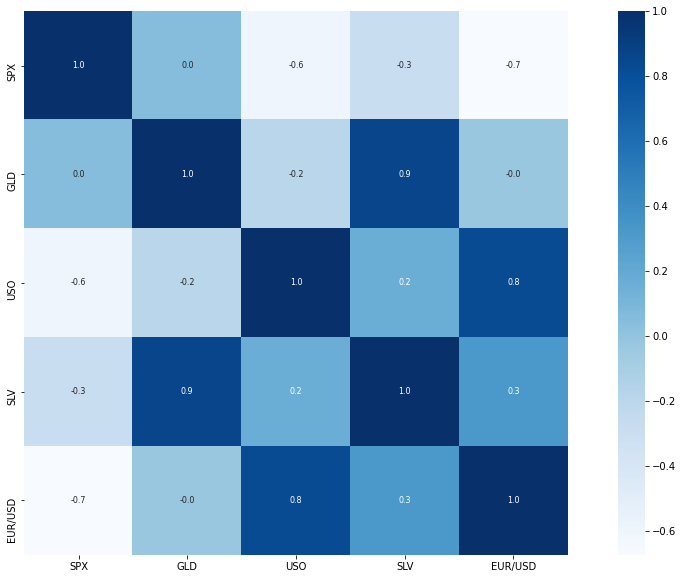

In [14]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (18,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [15]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


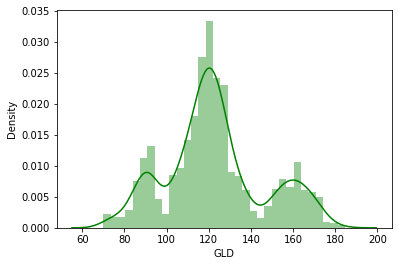

In [17]:
# checking the distribution of the GLD Price
sns.distplot(df['GLD'],color='green');

Splitting the Features and Target

In [18]:
X = df.drop(['Date','GLD'],axis=1)
y = df['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state=667
                                                    )

Model Training:
Random Forest Regressor

In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [23]:
# training the model
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Model Evaluation

In [24]:
# prediction on Test Data
pred = regressor.predict(X_test)

In [25]:
print(pred)

[ 73.76260167 151.19569923  91.67109971 168.83649962 120.35310071
  91.05109907 112.58990059 135.52429906  85.61879968 146.38550121
 132.77070282 126.4125006   94.52890178 161.34619952 122.60970019
 125.88519913  83.27799857 115.60849996 154.35320095  91.17969993
 122.84429985  89.92549978 115.41319792 114.4721993  151.9383024
 144.40650254 120.62089883 121.18539902 124.37319951 126.8610986
 155.99319988 125.85510212 105.30839969 111.63700076 126.90259972
  94.59470204 115.74890064 110.52720041 120.05799847  98.90140062
  95.10590139 152.23149901  87.4005985   89.23799964 146.69479653
 124.56079929 116.58129888  88.52109898 106.19780075 139.76549952
  85.7077989  119.67559987 108.4353996  122.67980021 114.97449993
 111.34250069 102.80300001 159.92269948 147.88560061 138.54799959
  76.32130018 119.37570115 155.24770151  87.31479871 111.26069934
 117.93580037  95.9302007  125.99789811 161.09179913 125.76640145
 132.03490328 102.37199866  88.9586991  132.47670307 149.83030059
  79.7581000

In [26]:
# R squared error
error_score = metrics.r2_score(y_test, pred)
print("R squared error : ", error_score)

R squared error :  0.9907061821809546


Compare the Actual Values and Predicted Values in a Plot

In [27]:
y_test = list(y_test)

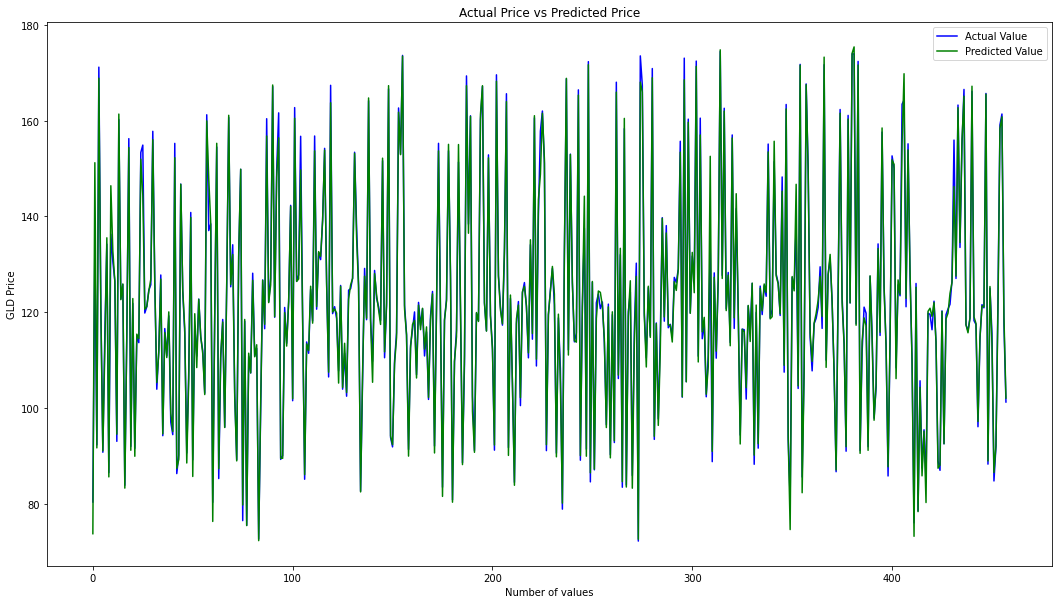

In [30]:
plt.figure(figsize=(18,10))

plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()